# Combine different files:

In [12]:
with open('log.csv', 'r') as f1:
    f1_content = f1.read()

with open('log.csv', 'r') as f2:
    f2_content = f2.read()

with open('combine.csv', 'a') as res:
    res.write(f1_content)
    res.write(f2_content)

In [13]:
import numpy as np

test = np.array([[1], [2], [3], [4], [5]])
test2 = np.array([3, 2])
test[~test2]


array([[2],
       [3]])

# Imports

In [14]:
import csv
import matplotlib.pyplot as plt

# Functions

In [15]:
def anglewrap(angList):
    # maps an 0 to 360 angle to -180 to +180
    for i in range(len(angList)):
        if (angList[i] > 180):
            angList[i] = angList[i] - 360
    return 

In [16]:

def import_data(name: str, wrap = True, cleanup = True):
    file = name + ".csv"
    pdoa_data = []
    tdoa_data = []
    rx_true_r = []

    dist_meas = []
    twr_count = []
    dist_true_r = []

    with open(file, "r") as f:
        reader = csv.reader(f)
        for i, line in enumerate(reader):
            linetype = int(line[0])
            if (linetype == 0):
                # rx data, featuring pdoa, tdoa and distance
                pdoa_data += [float(line[1])]
                tdoa_data += [int(line[2])]
                rx_true_r += [float(line[3])]
            
            if (linetype == 1):
                dist_meas += [int(line[5])]
                twr_count += [int(line[6])]
                dist_true_r += [float(line[7])]

            if (linetype == 2):
                print("CIR data")
    
    if (wrap):
        # Wrap angles
        anglewrap(rx_true_r)
        anglewrap(dist_true_r)

    if (cleanup):
        # Remove extreme dist outliers:
        dist_keep_indx = [i > 1000 for i in dist_meas]
        dist_meas_filt = []
        dist_r_filt = []
        twr_count_filt = []

        out_num = 0

        for i in range(len(dist_keep_indx)):
            if dist_keep_indx[i] == True:
                dist_meas_filt += [dist_meas[i]]
                dist_r_filt += [dist_true_r[i]]
                twr_count_filt += [twr_count[i]]
            else:
                out_num += 1

        print("Num of outliers: " + str(out_num))
        # Update values
        dist_meas = dist_meas_filt
        dist_true_r = dist_r_filt
        twr_count = twr_count_filt
    
    return (pdoa_data, tdoa_data, rx_true_r, dist_meas, twr_count, dist_true_r)

# Prepare data

In [17]:
rx_true_r = []
pdoa_data = []
dist_true_r = []
dist_meas = []

# List of measurements:
files = ["robclub1m", "robclub2m", "robclub3m", "robclub4m", "robclub5m"]
log_num = len(files)
for log in files:
    temp_pdoa, _, temp_rx_r, temp_dist, _, temp_dist_r = import_data(log, True, True)
    rx_true_r += [temp_rx_r]
    pdoa_data += [temp_pdoa]
    dist_true_r += [temp_dist_r]
    dist_meas += [temp_dist]

Num of outliers: 8
Num of outliers: 9
Num of outliers: 8
Num of outliers: 9
Num of outliers: 8


# Plot data

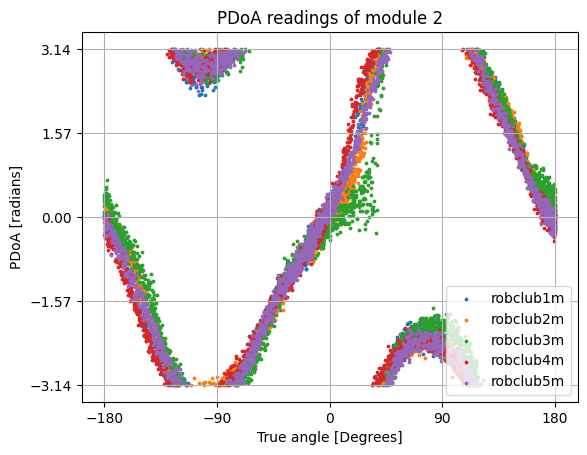

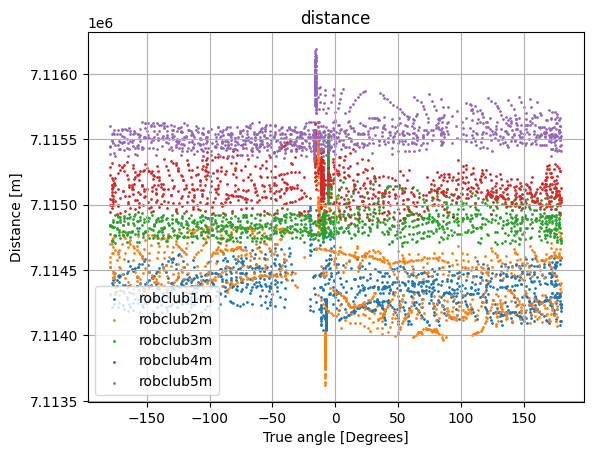

In [22]:
plt.figure()
plt.title("PDoA readings of module 2")
for i in range(log_num):
    plt.scatter(rx_true_r[i], pdoa_data[i], s=3.0)
plt.xlabel("True angle [Degrees]")
plt.ylabel("PDoA [radians]")
plt.xticks([-180, -90, 0, 90, 180])
plt.yticks([-3.14, -3.14/2, 0, 3.14/2, 3.14])
plt.grid()
plt.legend(files, loc='lower right')

plt.figure()
plt.title("distance")
for i in range(log_num):
    plt.scatter(dist_true_r[i], dist_meas[i], s=1.0)
plt.xlabel("True angle [Degrees]")
plt.ylabel("Distance [m]")
plt.grid()
plt.legend(files)

# Measurements over time

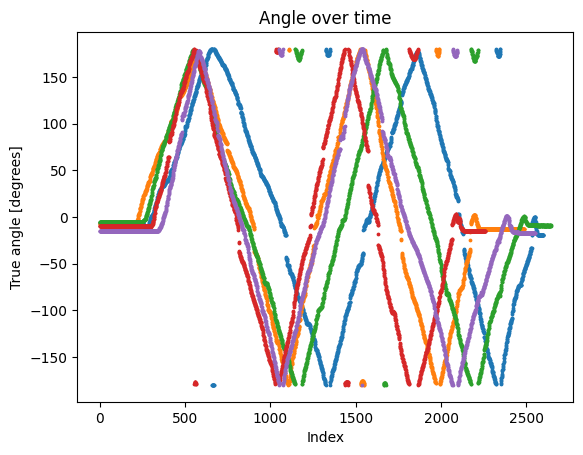

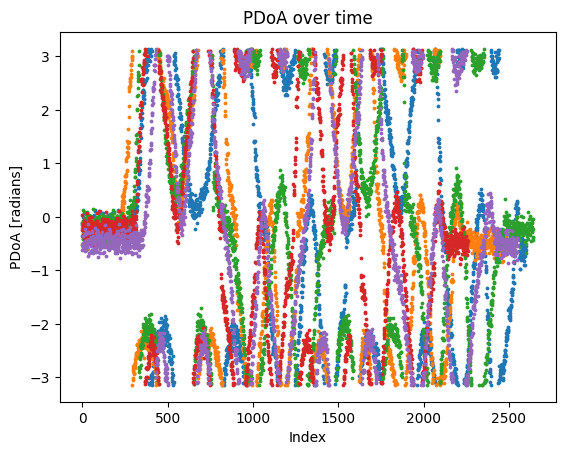

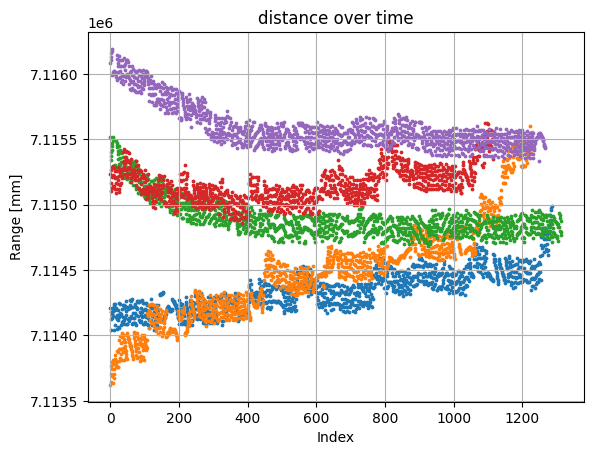

In [19]:
plt.figure()
plt.title("Angle over time")
for i in range(log_num):
    plt.scatter(range(len(rx_true_r[i])), rx_true_r[i], s=3.0)
plt.xlabel("Index")
plt.ylabel("True angle [degrees]")

plt.figure()
plt.title("PDoA over time")
for i in range(log_num):
    plt.scatter(range(len(pdoa_data[i])), pdoa_data[i], s=3.0)
plt.xlabel("Index")
plt.ylabel("PDoA [radians]")

plt.figure()
plt.title("distance over time")
for i in range(log_num):
    plt.scatter(range(len(dist_meas[i])), dist_meas[i], s=3.0)
plt.xlabel("Index")
plt.ylabel("Range [mm]")
plt.grid()

# Check if encoder goes too fast

(-20.0, 20.0)

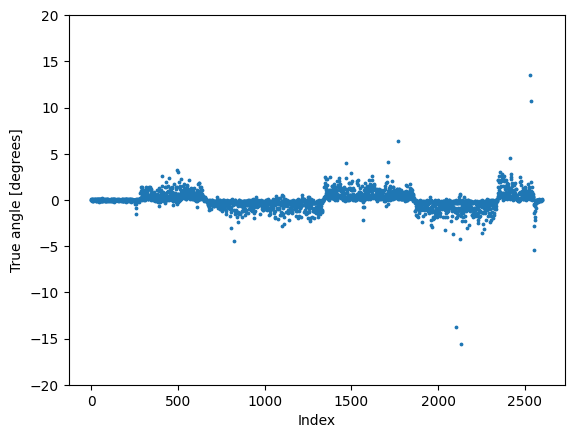

In [20]:
diff_encoder = []

for i in range(len(rx_true_r[0])-1):
    diff_encoder += [rx_true_r[0][i+1]-rx_true_r[0][i]]

plt.figure()
plt.scatter(range(len(diff_encoder)), diff_encoder, s=3.0)
plt.xlabel("Index")
plt.ylabel("True angle [degrees]")
plt.ylim([-20, 20])